In [1]:
%matplotlib inline
import math
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

In [2]:
def show(images) :
    if type(images) is np.ndarray:
        images = [images]
    l = len(images)
    fig = plt.figure()
    fig.set_size_inches(20,20)
    for i,image in enumerate(images):
        fig.add_subplot(1, l, i+1)
        if len(image.shape) == 3:
            plt.imshow(image)
            b,g,r = cv2.split(image)
            plt.imshow(cv2.merge((r,g,b)))
        else:
            plt.imshow(image, cmap='Greys')
          
    plt.show()


In [3]:
def get_frame_number(clip, n) :
    frame = clip.get_frame(float(n)/clip.fps)
    bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    return bgr_frame

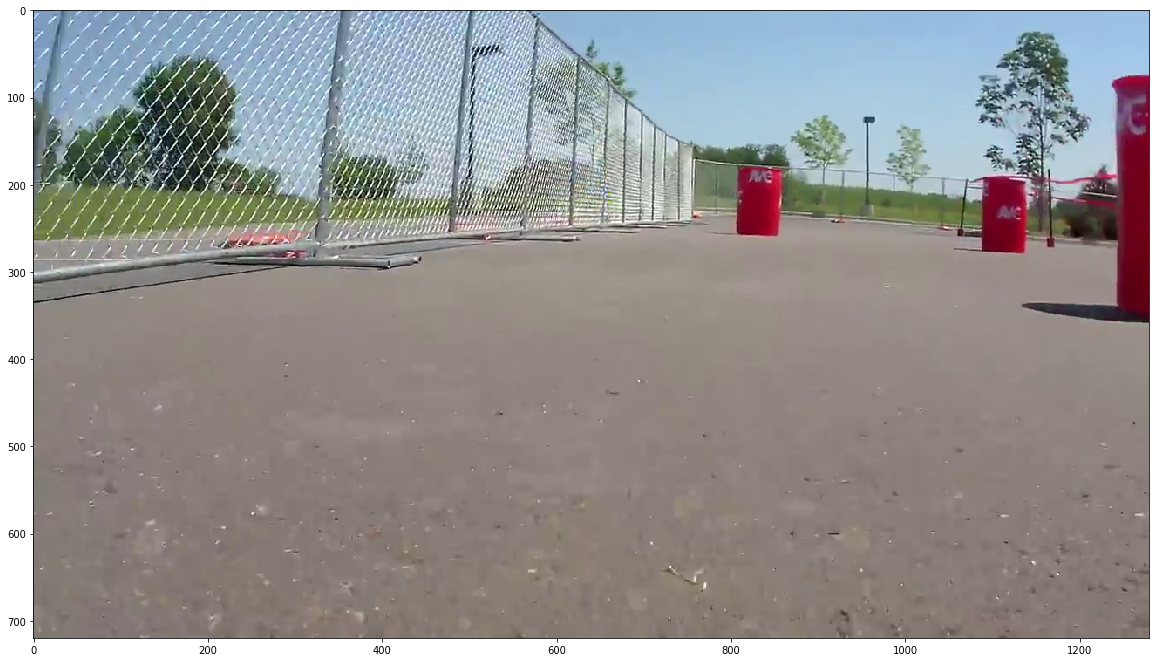

In [4]:
#im = cv2.imread('input/red_barrels_3.png')
clip = VideoFileClip('videos/video1.mp4')
#cap = cv2.VideoCapture('videos\video1.mp4')
#cap.set(2,0.3)
frame = clip.get_frame(22.0)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
show(frame)
im = frame

In [5]:
int(clip.fps * clip.duration)

1973

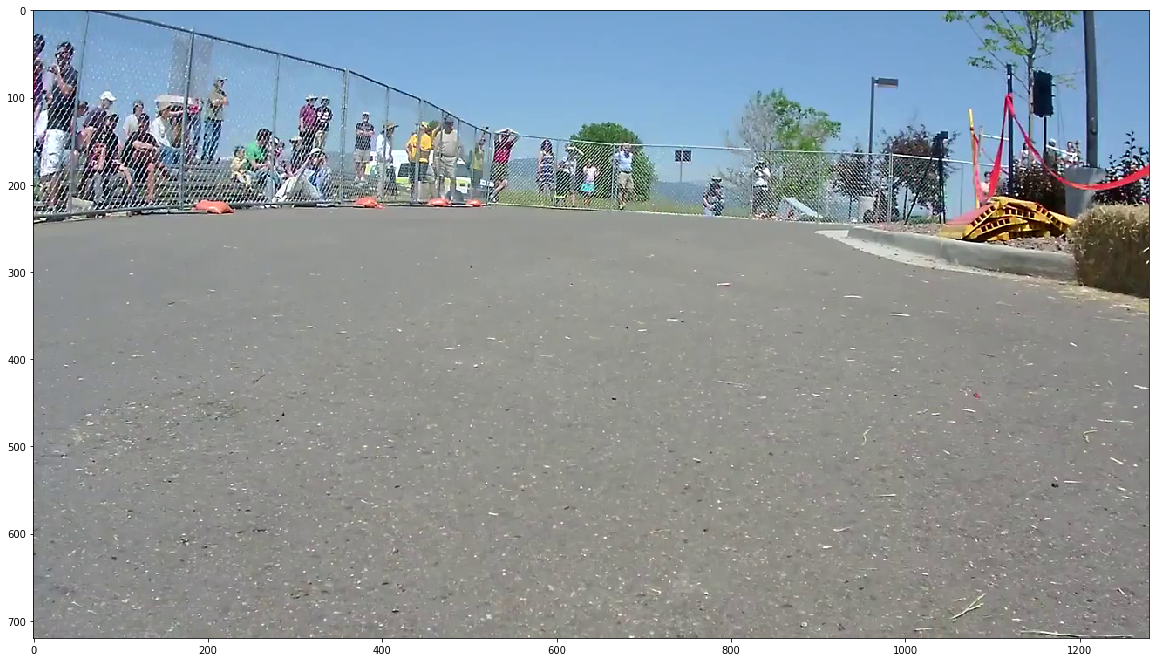

In [6]:
show(get_frame_number(clip, 10))

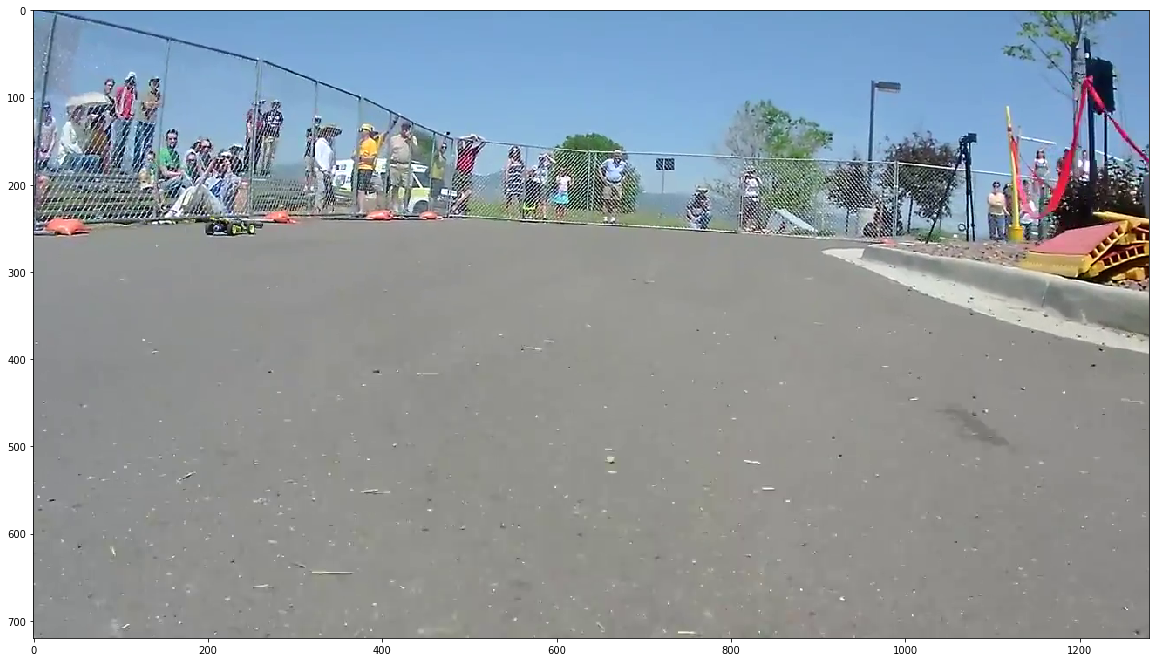

In [7]:
show(get_frame_number(clip,200))

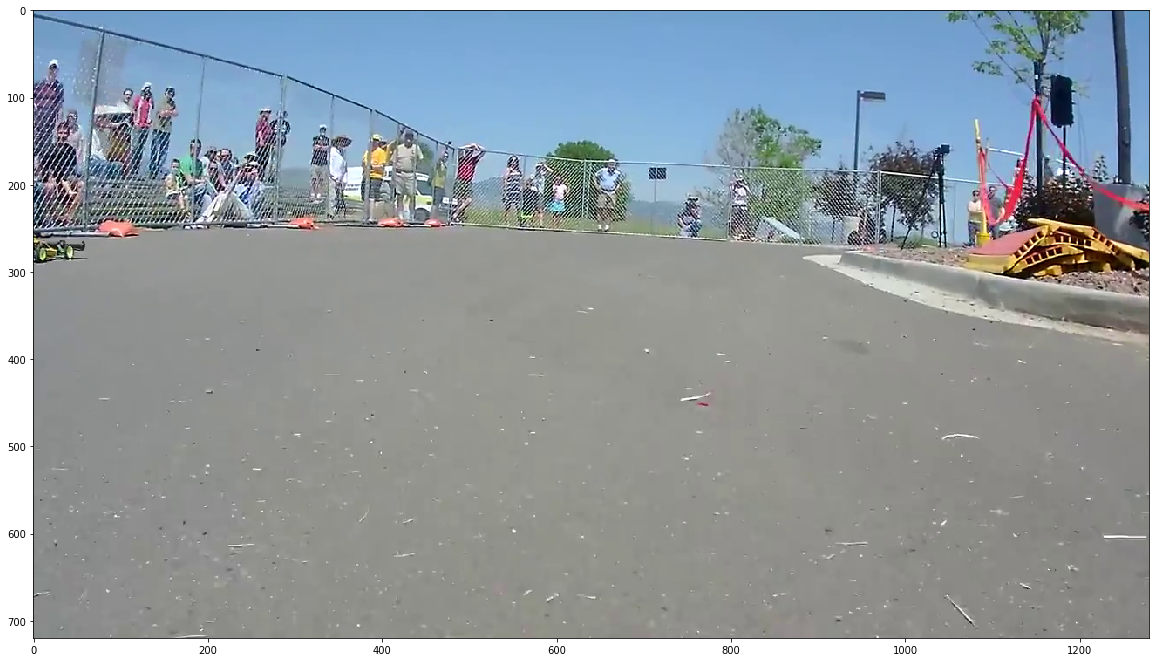

In [8]:
show(get_frame_number(clip, 190))

In [9]:
def split_up(min,max,ticks):
    return [int(min + (max-min) * i / float(ticks)) for i in range(ticks+1)]

In [10]:
vanishing_point_xy = (718,270)

In [11]:
def draw_vanishing_lines(im):
    im_h, im_w, _ = im.shape
    radius = 10
    thickness = 3

    color = (255,50,50,100)

    im = cv2.circle(im,vanishing_point_xy,radius,color)

    for x in split_up(0-5000,im_w+5000,ticks=30):
      cv2.line(im, (x,im_h), vanishing_point_xy, color)


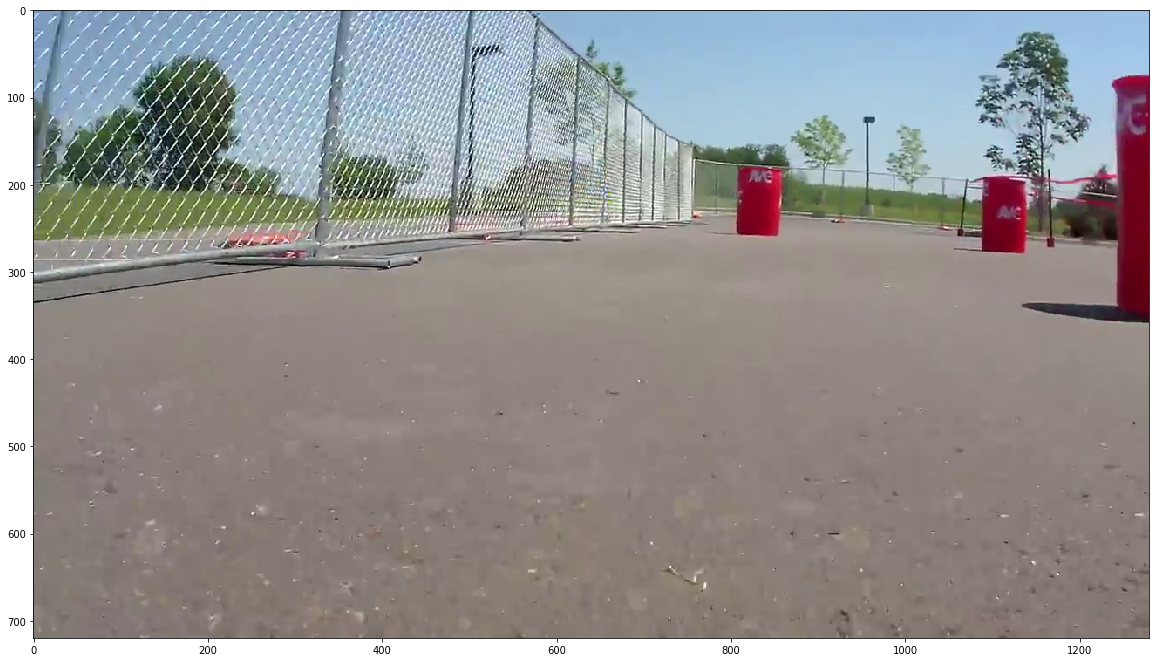

In [12]:
show(im)

In [13]:
im=cv2.blur(im,(15,15))

In [14]:
# based on https://stackoverflow.com/a/30333177/383967
def get_red_mask(img):
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join masks
    mask = np.invert(mask0+mask1)
    
    return mask



In [15]:
def mask_image(img, mask):
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    return output_img


In [16]:
def find_red(img):
    return mask_image(img, get_red_mask(img))


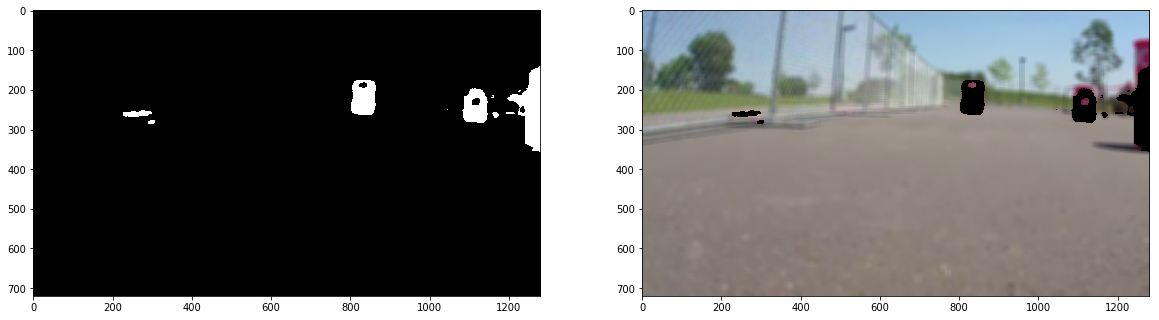

In [17]:
im_mask = get_red_mask(im)
im_red = find_red(im)
show([im_mask, im_red])


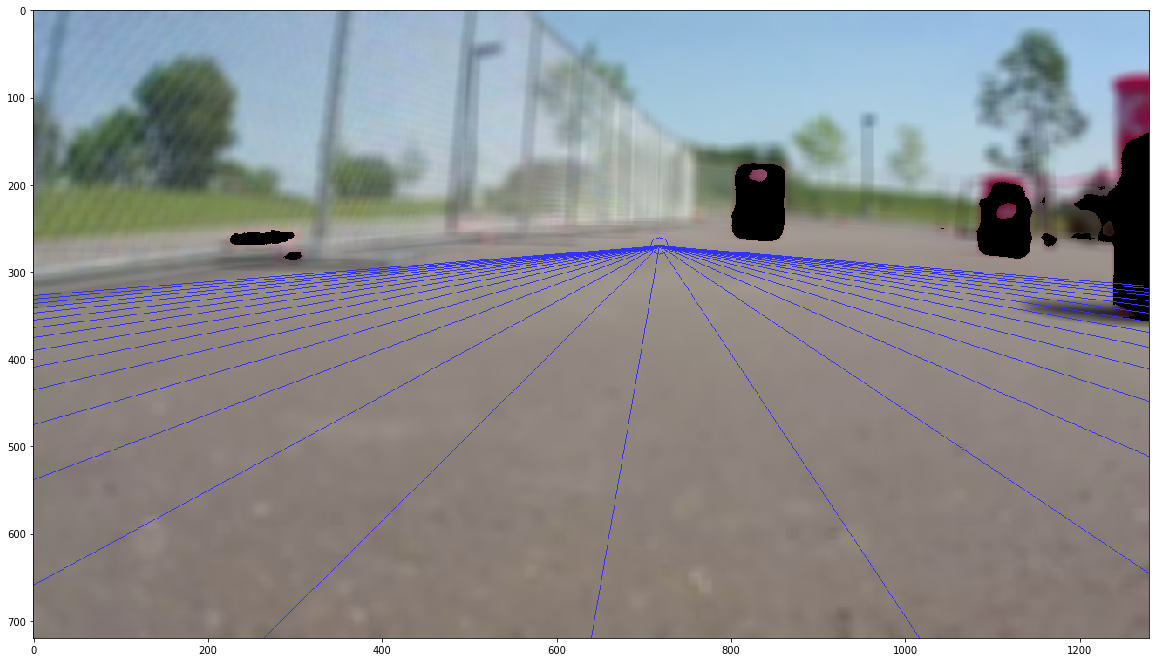

In [18]:
draw_vanishing_lines(im_red)
show([im_red])

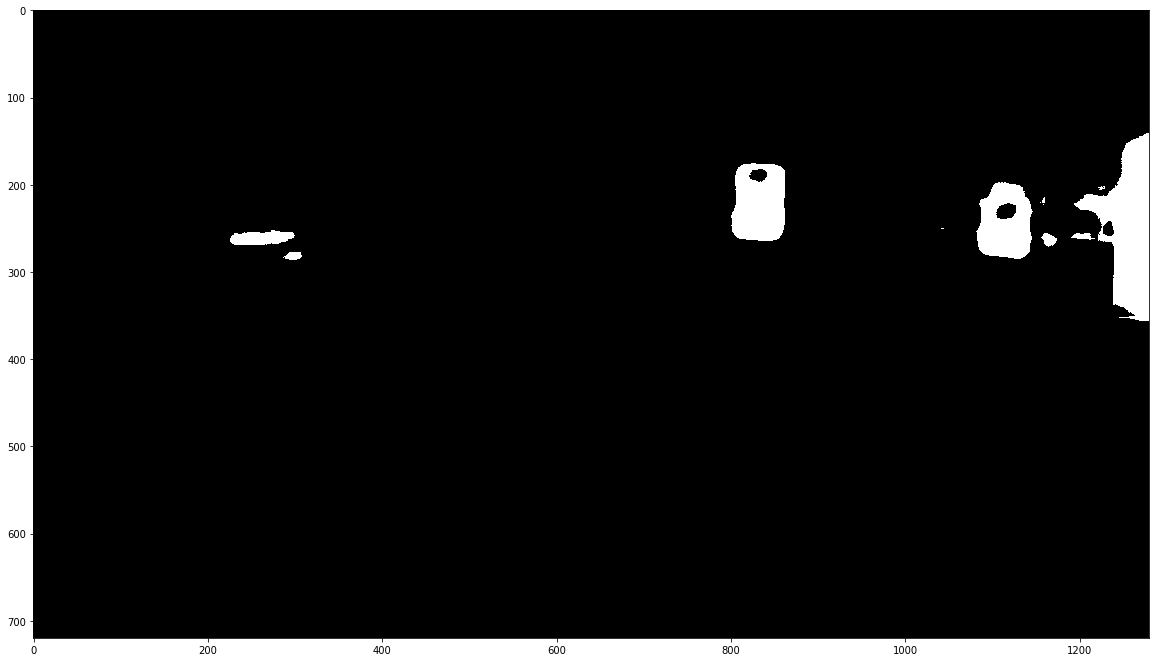

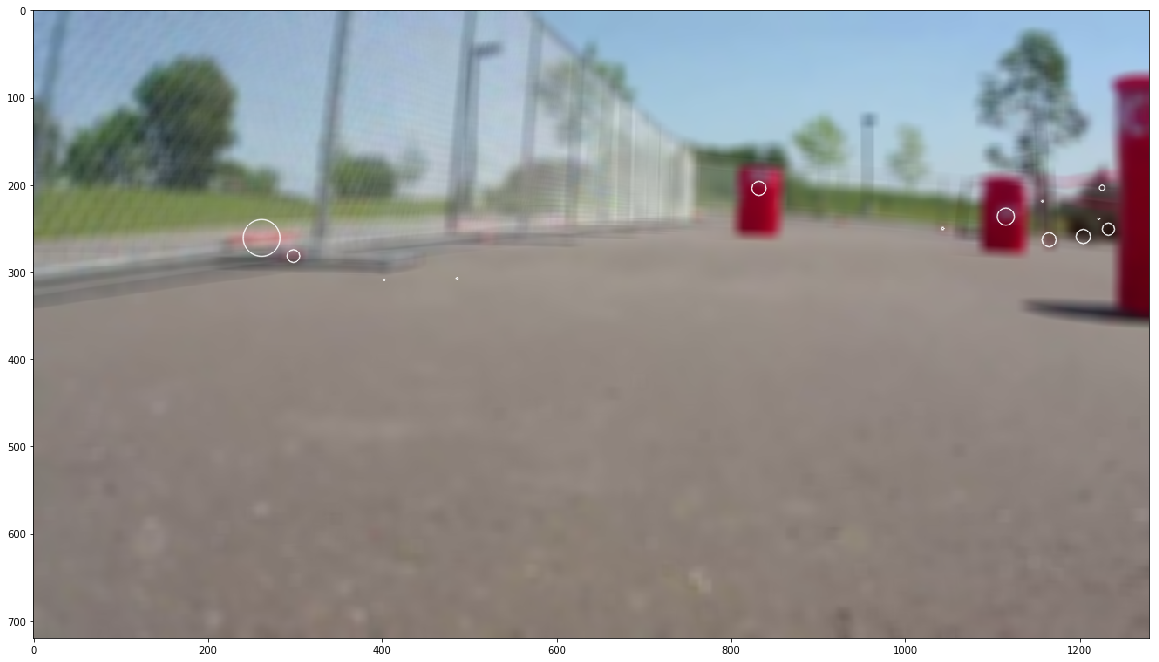

In [19]:
#cv2.SimpleBlobDetector_create
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
params.minArea = 20*20
params.filterByArea = False
params.filterByCircularity = False
params.minCircularity = 0
params.maxCircularity = 1000
params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.maxArea = 300*3000
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
keypoints = detector.detect(im_mask)
im_blank = np.zeros_like(im)
 
horizon = vanishing_point_xy[1]
#keypoints = [k for k in keypoints if k.pt[1] < vanishing_point_xy[1]+30]
#keypoints = [k for k in keypoints if k.pt[1]+k.size/2. > vanishing_point_xy[1]]

# Draw detected blobs as circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


show(im_mask)
show(im_with_keypoints)

In [20]:
horizon


270

In [21]:
# top of barrel should be above horizon, bottom of barrel should be below horizon
# middle of barrel should be above horizon

In [22]:
len(keypoints)

13

In [23]:
for k in keypoints:
    print('angle', k.angle)
    print('class_id',k.class_id)
    print('octave', k.octave)
    print('pt',k.pt)
    print('response',k.response)
    print('size',k.size)
    print()

angle -1.0
class_id -1
octave 0
pt (485.8669128417969, 307.0536193847656)
response 0.0
size 2.0

angle -1.0
class_id -1
octave 0
pt (298.1944580078125, 281.7172546386719)
response 0.0
size 14.682944297790527

angle -1.0
class_id -1
octave 0
pt (1204.138671875, 259.1872863769531)
response 0.0
size 16.552154541015625

angle -1.0
class_id -1
octave 0
pt (1164.9573974609375, 262.9676818847656)
response 0.0
size 16.409229278564453

angle -1.0
class_id -1
octave 0
pt (261.7012634277344, 260.8504638671875)
response 0.0
size 42.06809616088867

angle -1.0
class_id -1
octave 0
pt (1043.0, 250.0)
response 0.0
size 2.8284270763397217

angle -1.0
class_id -1
octave 0
pt (1232.94873046875, 250.8271942138672)
response 0.0
size 14.078161239624023

angle -1.0
class_id -1
octave 0
pt (1222.0, 239.0)
response 0.0
size 2.0

angle -1.0
class_id -1
octave 0
pt (1157.224365234375, 218.6999969482422)
response 0.0
size 2.0

angle -1.0
class_id -1
octave 0
pt (1115.3343505859375, 236.45095825195312)
response 0.

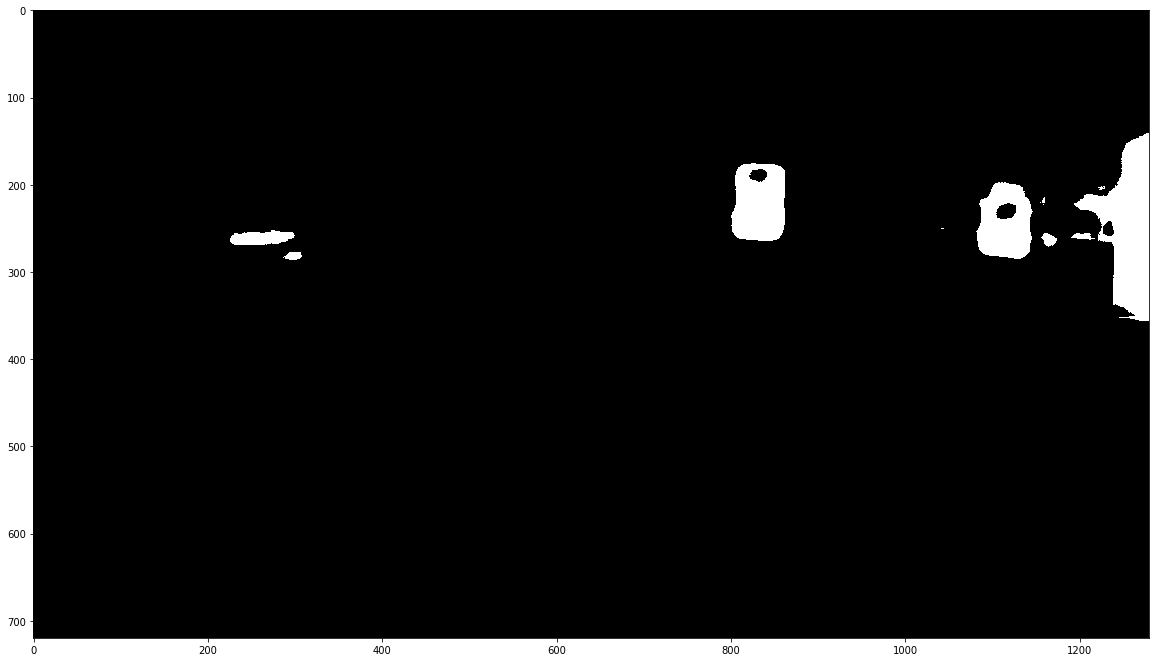

In [24]:
show(im_mask)

In [25]:
#im_dilated =cv2.dilate(im_mask,(180,180))
#im_eroded = cv2.erode(im_dilated,(180,180))
#show([im_eroded])
#im_mask = im_eroded

In [26]:
# see http://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html
im_,contours,hierarchy = cv2.findContours(im_mask,cv2.RETR_TREE ,2)

In [27]:
def circularity(contour):
    perimeter = cv2.arcLength(contour, True)
    return 4 * math.pi * cv2.contourArea(contour) / (perimeter * perimeter)


In [28]:
def centroid(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return (cx, cy)
    

In [29]:
im_draw = im.copy()

In [30]:
for contour, i in zip(contours,range(len(contours))):
    hull = cv2.convexHull(contour,contour)
    contour = hull
    cv2.drawContours(im_draw,[contour],0,(0,0,255),2)
    area = cv2.contourArea(contour)
    if area < 20*20:
        continue
    print()
    print(i)
    print('len',len(contour))
    print('area',cv2.contourArea(contour))
    if(len(contour)>=5): 
        e = cv2.fitEllipse(contour)
        cv2.ellipse(im_draw, e, (255,255,155))
        print('Ellipse',e)
    if(len(contour)>1):
        print('circularity', circularity(contour))
        print(cv2.arcLength(contour,True))
        cv2.putText(im_draw,str(round(circularity(contour),2)),centroid(contour),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))


    


1
len 4
area 915609.0
circularity 0.7234518268850425
3988.0

6
len 18
area 1094.0
Ellipse ((261.1241455078125, 260.4612731933594), (19.37068748474121, 78.2171859741211), 86.48884582519531)
circularity 0.5105503445221844
164.09460628032684

14
len 27
area 4956.0
Ellipse ((1114.30615234375, 243.903076171875), (70.57872772216797, 97.62149047851562), 0.15627801418304443)
circularity 0.9235855228661324
259.67612540721893

16
len 34
area 5250.5
Ellipse ((832.4234619140625, 219.77894592285156), (77.44680786132812, 99.77654266357422), 3.3375160694122314)
circularity 0.8894483629402482
272.36098325252533


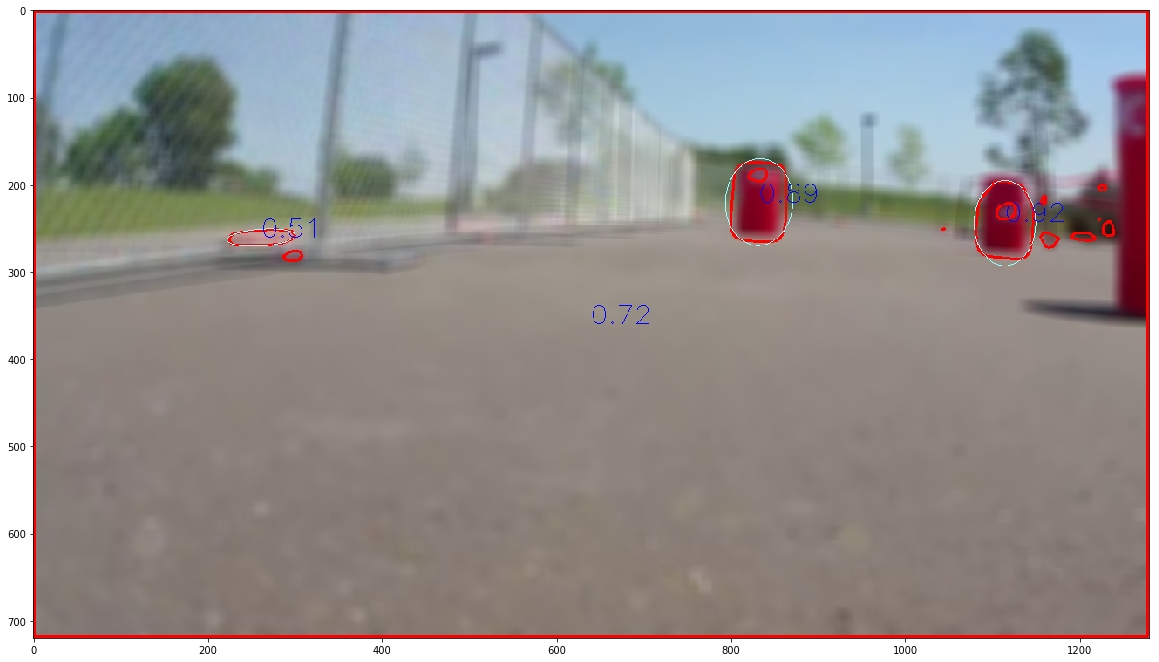

In [31]:
show(im_draw)